**Summary:**

1. **Importing Libraries:**
   - Imported necessary libraries such as Pandas for data manipulation, Seaborn, and Matplotlib for visualization.

2. **Data Reading:**
   - Used Pandas to read a CSV file containing online sales data.

3. **Date Manipulation:**
   - Converted the date column to the datetime format.
   - Extracted the month.
   - Created a DataFrame with the minimum and maximum transaction dates for each customer.

4. **Cohort Index Creation:**
   - Calculated the cohort index, representing the period in which each customer made their first transaction.

5. **Grouping and Counting:**
   - Grouped the data by cohort and cohort index.
   - Counted the number of unique customers in each group.

6. **Retention Visualization:**
   - Calculated retention rates for each cohort and cohort index.
   - Generated a table and a heatmap for visualization.


In [112]:
import os

# Set the main directory
os.chdir(r'C:\Users\wokra\Desktop\github\cohort')

# Check if the directory has been changed
print(os.getcwd())

C:\Users\wokra\Desktop\github\cohort


1. **Importing Libraries:**

In [113]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting functionalities


2. **Data Reading:**

In [114]:
# Reading a CSV file into a Pandas DataFrame
df = pd.read_csv("data/raw/Online_Sales.csv")


In [115]:
# Displaying the first few rows of the DataFrame for initial exploration
df.head()


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


3. **Date Manipulation:**

In [116]:
# Converting the "Transaction_Date" column to datetime format and extracting the month
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format='%m/%d/%Y').dt.to_period('M').dt.to_timestamp()


In [117]:
# Finding the minimum transaction date for each customer
min_dates = df.groupby('CustomerID')['Transaction_Date'].min().reset_index()
min_dates.rename(columns={'Transaction_Date': 'Min_Transaction_Date'}, inplace=True)

# Finding the maximum transaction date for each customer
max_dates = df.groupby('CustomerID')['Transaction_Date'].max().reset_index()
max_dates.rename(columns={'Transaction_Date': 'Max_Transaction_Date'}, inplace=True)

# Merging the minimum and maximum transaction dates based on CustomerID
cohort_data = pd.merge(min_dates, max_dates, on='CustomerID')


In [118]:
# Displaying the first few rows of the cohort_data DataFrame
cohort_data.head()


,CustomerID,Min_Transaction_Date,Max_Transaction_Date
0,12346,2019-09-01,2019-09-01
1,12347,2019-03-01,2019-11-01
2,12348,2019-06-01,2019-10-01
3,12350,2019-12-01,2019-12-01
4,12356,2019-09-01,2019-09-01


4. **Cohort Index Creation:**

In [119]:
# Calculating the cohort index based on the difference in months between Max and Min Transaction Dates
cohort_data['cohort_index'] = (cohort_data['Max_Transaction_Date'].dt.month - cohort_data['Min_Transaction_Date'].dt.month) + 1


5. **Grouping and Counting:**

In [120]:
# Grouping the cohort_data DataFrame by the minimum transaction date and cohort index
group_cohort = cohort_data.groupby(["Min_Transaction_Date", "cohort_index"])


In [121]:
# Calculating the number of unique customers in each cohort
cohort = group_cohort["CustomerID"].apply(pd.Series.nunique)


6. **Retention Visualization:**

In [122]:
# Resetting the index of the cohort DataFrame and pivoting the data to create a cohort counts table
cohort = cohort.reset_index()
cohort_counts = cohort.pivot(index="Min_Transaction_Date",
                             columns="cohort_index",
                             values="CustomerID")


In [123]:
cohort_counts# Displaying the cohort counts table
cohort_counts


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
Min_Transaction_Date,,,,,,,,,,,,
2019-01-01,96.0,2.0,2.0,7.0,5.0,13.0,8.0,16.0,7.0,11.0,14.0,34.0
2019-02-01,29.0,1.0,3.0,5.0,2.0,7.0,6.0,10.0,10.0,7.0,16.0,NaN
2019-03-01,71.0,6.0,9.0,8.0,13.0,15.0,13.0,11.0,12.0,19.0,NaN,NaN
2019-04-01,83.0,5.0,11.0,12.0,9.0,11.0,5.0,15.0,12.0,NaN,NaN,NaN
2019-05-01,59.0,4.0,4.0,8.0,6.0,10.0,13.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,80.0,7.0,9.0,8.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,62.0,8.0,2.0,3.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,95.0,12.0,12.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,69.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Extracting the cohort sizes (first column) and calculating retention rates
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention_percentage = retention.round(3) * 100


In [126]:
#retention rates
retention_percentage

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
Min_Transaction_Date,,,,,,,,,,,,
2019-01-01,100.0,2.1,2.1,7.3,5.2,13.5,8.3,16.7,7.3,11.5,14.6,35.4
2019-02-01,100.0,3.4,10.3,17.2,6.9,24.1,20.7,34.5,34.5,24.1,55.2,NaN
2019-03-01,100.0,8.5,12.7,11.3,18.3,21.1,18.3,15.5,16.9,26.8,NaN,NaN
2019-04-01,100.0,6.0,13.3,14.5,10.8,13.3,6.0,18.1,14.5,NaN,NaN,NaN
2019-05-01,100.0,6.8,6.8,13.6,10.2,16.9,22.0,13.6,NaN,NaN,NaN,NaN
2019-06-01,100.0,8.8,11.2,10.0,12.5,15.0,13.8,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,12.9,3.2,4.8,16.1,14.5,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,12.6,12.6,8.4,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.2,2.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Retention Rate'}, xlabel='cohort_index', ylabel='Min_Transaction_Date'>

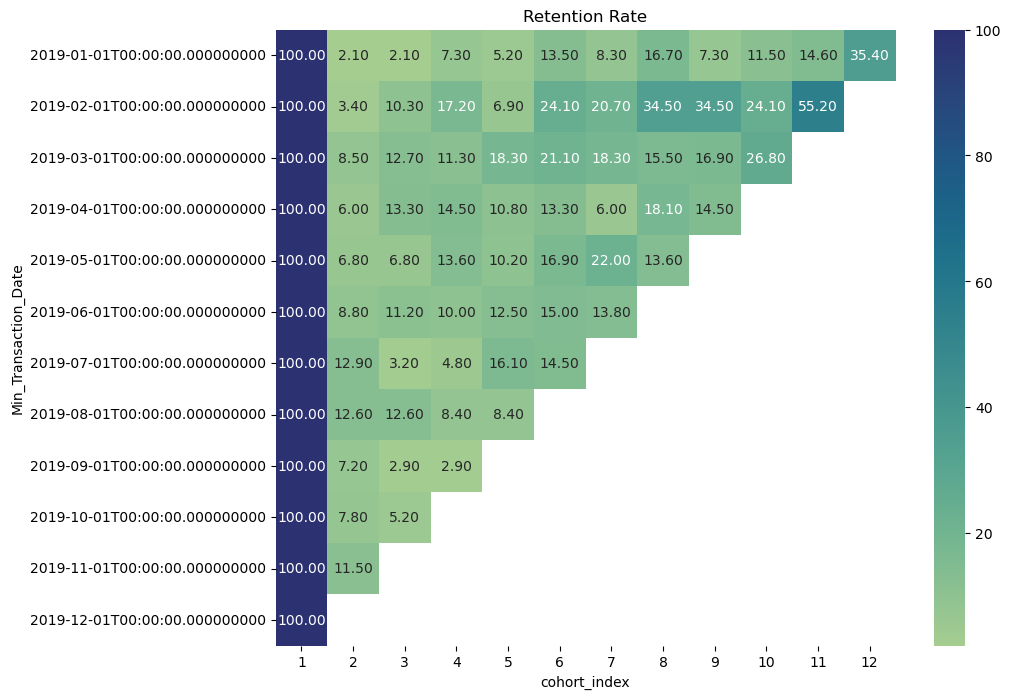

In [129]:
# Creating a heatmap to visualize the retention rates with full numbers
plt.figure(figsize=(10, 8))
plt.title("Retention Rate")
sns.heatmap(
    data=retention_percentage,
    annot=True,
    fmt=".2f",  # Displaying full numbers without scientific notation
    cmap="crest"
)


**Summary:**

**Initial Cohort (2019-01-01):**
- The retention rate in the second month is 2.1%. This means that only 2.1% of customers from the initial cohort remained in the second month.
- In the following months, the retention rate fluctuates, reaching 35.4% in the 12th month.

**Intermediate Cohorts (2019-02-01 to 2019-11-01):**
- In some months and intermediate cohorts, the retention rate in the second month is relatively higher, indicating a significant portion of returning customers.
- However, in more distant cohorts, the retention rates decrease, suggesting a downward trend over time.
- Some cohorts have NaN values in later months, indicating that there were not enough customers to calculate the retention rate.

**Final Cohort (2019-12-01):**
- The final cohort has NaN values in all months, suggesting insufficient data to calculate the retention rate over time for this cohort.

**Conclusions:**
- Customer retention varies significantly among cohorts, indicating different behavioral patterns over time.
- The initial cohort shows a relatively low retention rate, while some intermediate cohorts exhibit higher rates in the second month.
- The presence of NaN values in some cohorts suggests the need for additional data for a more comprehensive analysis.
